# 1. Data Preparation

In [1]:
# # prompt: connect drive

# from google.colab import drive
# drive.mount('/content/drive')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
pd.set_option('display.max_colwidth', 1000)

In [4]:
df_train = pd.read_csv("/kaggle/input/news-dataset/final_news_train.csv")
df_test = pd.read_csv("/kaggle/input/news-dataset/final_news_test.csv")

In [5]:
df_train.head()

,label,text
0,2,"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
1,2,"Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,2,Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
3,2,"Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
4,2,"Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."


In [6]:
df_test.head()

,label,text
0,2,Fears for T N pension after talks Unions representing workers at Turner Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.
1,3,"The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com) SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket."
2,3,"Ky. Company Wins Grant to Study Peptides (AP) AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins."
3,3,"Prediction Unit Helps Forecast Wildfires (AP) AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar."
4,3,"Calif. Aims to Limit Farm-Related Smog (AP) AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure."


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227963 entries, 0 to 227962
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   227963 non-null  int64 
 1   text    227963 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.5+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19596 entries, 0 to 19595
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   19596 non-null  int64 
 1   text    19596 non-null  object
dtypes: int64(1), object(1)
memory usage: 306.3+ KB


In [9]:
df_train.isnull().sum()

label    0
text     0
dtype: int64

In [10]:
df_test.isnull().sum()

label    0
text     0
dtype: int64

# EDA

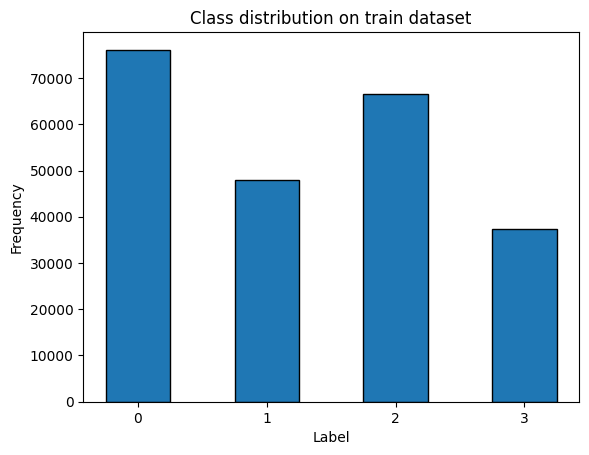

In [11]:
label_counts = df_train['label'].value_counts().sort_index()

# Trục x và y
x = label_counts.index
y = label_counts.values

# Vẽ biểu đồ cột với cột tách nhau (width < 1)
plt.title('Class distribution on train dataset')
plt.bar(x, y, width=0.5, edgecolor='black')  # width < 1 giúp cột không dính nhau
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(x)  # Đảm bảo nhãn trục x đúng và nằm giữa
plt.show()

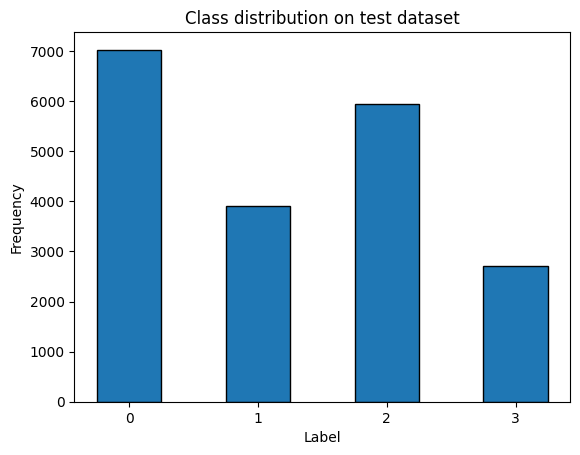

In [12]:
label_counts = df_test['label'].value_counts().sort_index()

# Trục x và y
x = label_counts.index
y = label_counts.values

# Vẽ biểu đồ cột với cột tách nhau (width < 1)
plt.title('Class distribution on test dataset')
plt.bar(x, y, width=0.5, edgecolor='black')  # width < 1 giúp cột không dính nhau
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(x)  # Đảm bảo nhãn trục x đúng và nằm giữa
plt.show()

In [13]:
import re

def contains_html(text):
  """Checks if a string contains HTML tags."""
  match = re.search('<.*?>', text)
  return bool(match)

html_rows = df_train[df_train['text'].apply(contains_html)]

html_rows.head()

,label,text


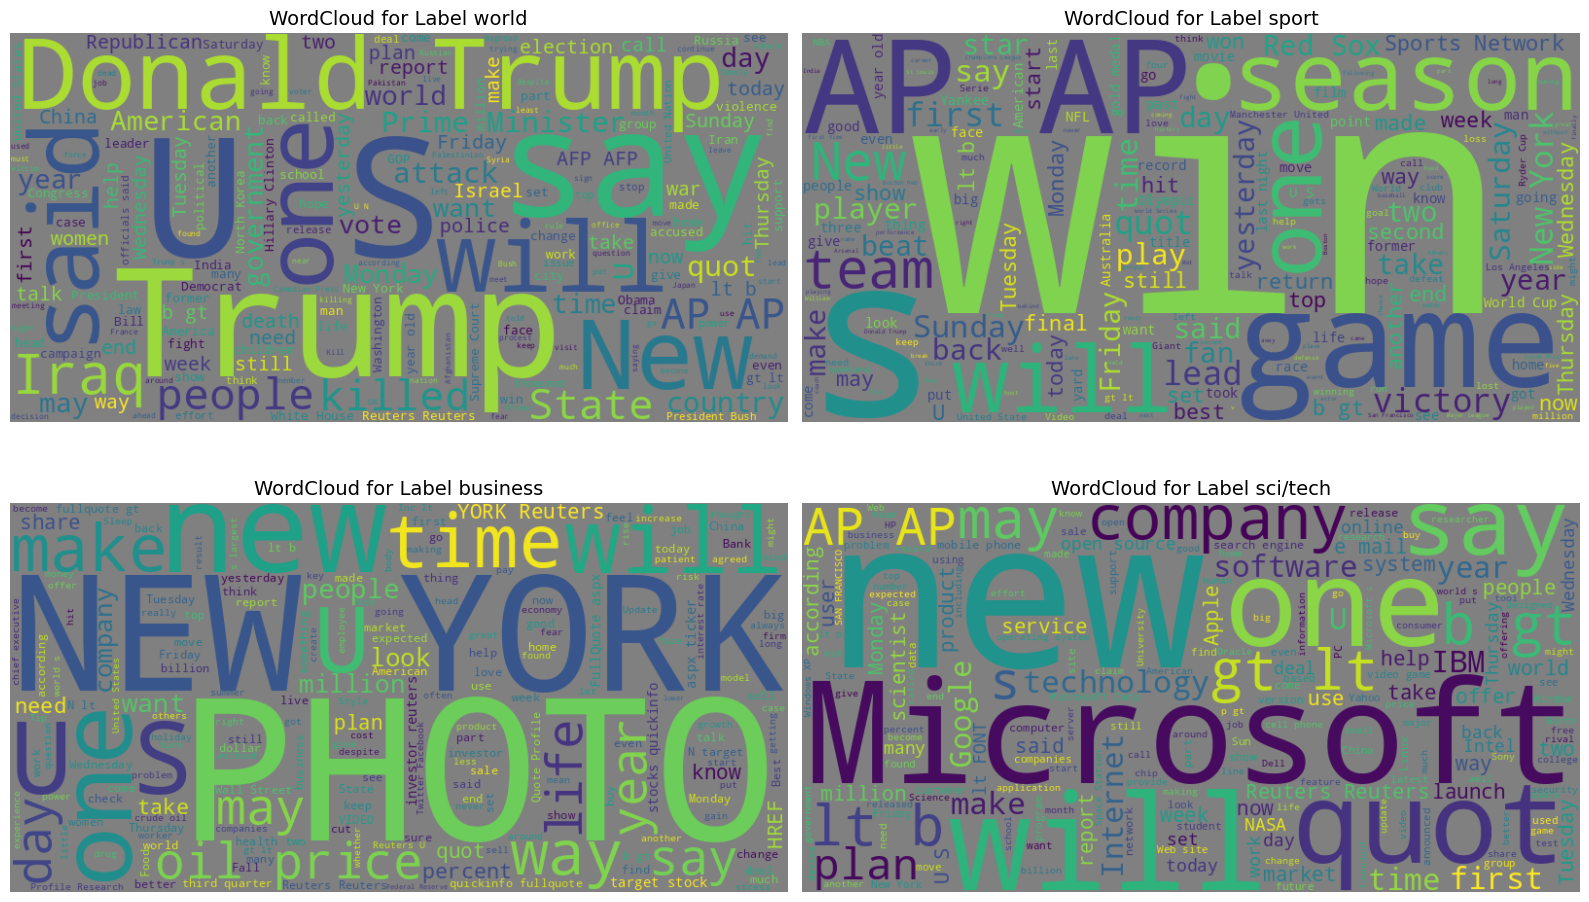

In [14]:
from wordcloud import WordCloud

label_map = {
    0: 'world',
    1: 'sport',
    2: 'business',
    3: 'sci/tech'
}

labels = df_train['label'].unique()
labels.sort()

plt.figure(figsize=(16, 10))

for i, label in enumerate(labels):
    text = ' '.join(df_train[df_train['label'] == label]['text'].dropna().astype(str))

    wordcloud = WordCloud(width=800, height=400, background_color='gray').generate(text)

    plt.subplot(2, 2, i+1)  # 2 hàng, 2 cột cho 4 nhãn
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for Label {label_map[label]}', fontsize=14)

plt.tight_layout()
plt.show()

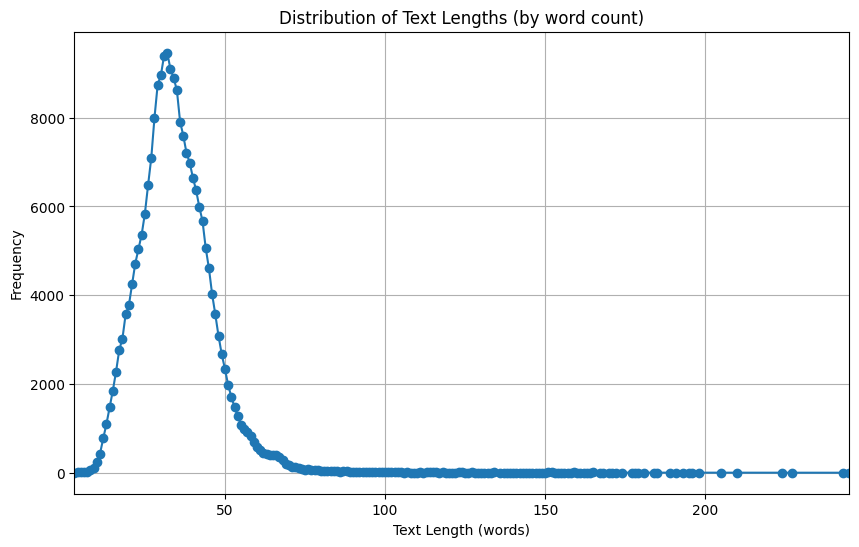

In [15]:
# Tính độ dài mỗi văn bản theo số từ
df_train['text_length'] = df_train['text'].dropna().apply(lambda x: len(str(x).split()))

# Đếm tần suất xuất hiện mỗi độ dài
length_counts = df_train['text_length'].value_counts().sort_index()
min_len = df_train['text_length'].min()
max_len = df_train['text_length'].max()
df_train = df_train.drop(columns=['text_length'])

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(length_counts.index, length_counts.values, marker='o')
plt.xlabel('Text Length (words)')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths (by word count)')
plt.xlim(min_len, max_len)
plt.grid(True)
plt.show()

In [16]:
print(min_len)
print(max_len)

3
245


# Spliting train, validation, test

In [17]:
import torch
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer
from sklearn.ensemble import RandomForestClassifier
from torch.optim import AdamW


In [18]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(
    df_train,
    test_size=0.1,         # 10% cho validation
    random_state=42,       # Để tái lập kết quả
    stratify=df_train['label']  # Nếu muốn chia đều theo nhãn
)

print(df_train.shape)
print(df_val.shape)

(205166, 2)
(22797, 2)


In [19]:
df_train_1 = df_train.copy()
df_val_1 = df_val.copy()
df_test_1 = df_test.copy()

# 4. ML models

**Preprocessing Data**


1. Lowercase
2. Remove Punctuations
3. Remove Numbers (consideration)
4. Remove Stopwords
5. Tokenize
6. Lemmatize/Stem



In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower() # Lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Remove puctuations and digits
    tokens = nltk.word_tokenize(text) # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1] # Lemmatize and remove stopwords

    # Merge into string
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [21]:
mask_train = df_train['text'].notnull()
df_train.loc[mask_train, 'clean_text'] = df_train.loc[mask_train, 'text'].apply(preprocess_text)

mask_val = df_val['text'].notnull()
df_val.loc[mask_val, 'clean_text'] = df_val.loc[mask_val, 'text'].apply(preprocess_text)

mask_test = df_test['text'].notnull()
df_test.loc[mask_test, 'clean_text'] = df_test.loc[mask_test, 'text'].apply(preprocess_text)

In [22]:
print(df_train.head())

        label  \
132423      1   
82113       3   
46987       2   
131021      1   
191716      2   

                                                                                                                                                                                                                                                                                                   text  \
132423  On June 24, 2016, Independence Day: Resurgence, the sequel to the original, will hit theaters. The aliens are back! And all nations must band together as a unified force to fight them. (And they do so using recovered alien technology.) A Peek Inside the Film Independence Day: Resurgence   
82113                                                                                                                            Supernova produces cosmic rays Astronomers claim to have found the first firm evidence that cosmic rays can come from stars that have exploded, or supernova remnants.   


**Vectorize with TFIDF**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)

In [24]:
train_tfidf_text = df_train['clean_text'].values
train_tfidf_label = df_train['label'].values
test_tfidf_text = df_test['clean_text'].values
test_tfidf_label = df_test['label'].values
val_tfidf_text = df_val['clean_text'].values
val_tfidf_label = df_val['label'].values

In [25]:
# Fit Vectorizer to train dataset and apply on valid & test dataset
X_tfidf_train = vectorizer.fit_transform(df_train['clean_text'])
X_tfidf_val = vectorizer.transform(df_val['clean_text'])
X_tfidf_test = vectorizer.transform(df_test['clean_text'])

In [26]:
print(X_tfidf_train.shape)
print(X_tfidf_val.shape)
print(X_tfidf_test.shape)

(205166, 1000)
(22797, 1000)
(19596, 1000)


In [27]:
X_tfidf_train = X_tfidf_train.toarray()
X_tfidf_val = X_tfidf_val.toarray()
X_tfidf_test = X_tfidf_test.toarray()

In [28]:
print(vectorizer.get_feature_names_out())

['able' 'access' 'according' 'accused' 'across' 'act' 'action' 'actually'
 'ad' 'add' 'administration' 'afghan' 'afghanistan' 'afp' 'africa'
 'african' 'age' 'agency' 'ago' 'agreed' 'agreement' 'ahead' 'aid' 'air'
 'airline' 'al' 'allow' 'almost' 'already' 'also' 'always' 'america'
 'american' 'amid' 'among' 'amp' 'analyst' 'angeles' 'announced' 'another'
 'ap' 'appeal' 'apple' 'application' 'arafat' 'area' 'arm' 'army' 'around'
 'arrested' 'art' 'ask' 'asked' 'assault' 'association' 'athens' 'attack'
 'attempt' 'attorney' 'august' 'australia' 'australian' 'authority'
 'award' 'away' 'baby' 'back' 'bad' 'baghdad' 'ban' 'bank' 'bankruptcy'
 'barrel' 'baseball' 'battle' 'beat' 'beauty' 'become' 'began' 'begin'
 'behind' 'believe' 'benefit' 'bernie' 'best' 'better' 'bid' 'big'
 'biggest' 'bill' 'billion' 'black' 'blast' 'blue' 'board' 'body' 'bomb'
 'book' 'boost' 'border' 'boston' 'bowl' 'brain' 'break' 'bring' 'britain'
 'british' 'brown' 'build' 'building' 'bush' 'business' 'buy' 'cali

**Models**

In [29]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
lr = SGDClassifier(loss = "log_loss", max_iter=1, warm_start = True, learning_rate="constant", eta0=0.01, random_state=42)

best_accuracy = 0
no_improvement_count = 0
early_stopping_threshold = 3
epochs = 50

In [33]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    lr.fit(X_tfidf_train, train_tfidf_label)

    train_preds = lr.predict(X_tfidf_train)
    val_preds = lr.predict(X_tfidf_val)

    train_probs = lr.predict_proba(X_tfidf_train)
    val_probs = lr.predict_proba(X_tfidf_val)

    train_loss = log_loss(train_tfidf_label, train_probs)
    val_loss = log_loss(val_tfidf_label, val_probs)

    train_accuracy = np.mean(train_preds == train_tfidf_label)
    val_accuracy = np.mean(val_preds == val_tfidf_label)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_accuracy:.4f}")

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= early_stopping_threshold:
        print("Early stopping triggered.")
        break

Epoch 1/50 - Train Loss: 0.7878 | Train Acc: 0.7611 | Val Loss: 0.7902 | Val Acc: 0.7610
Epoch 2/50 - Train Loss: 0.7177 | Train Acc: 0.7721 | Val Loss: 0.7211 | Val Acc: 0.7721
Epoch 3/50 - Train Loss: 0.6930 | Train Acc: 0.7765 | Val Loss: 0.6971 | Val Acc: 0.7752
Epoch 4/50 - Train Loss: 0.6817 | Train Acc: 0.7789 | Val Loss: 0.6862 | Val Acc: 0.7771
Epoch 5/50 - Train Loss: 0.6758 | Train Acc: 0.7804 | Val Loss: 0.6806 | Val Acc: 0.7776
Epoch 6/50 - Train Loss: 0.6725 | Train Acc: 0.7812 | Val Loss: 0.6775 | Val Acc: 0.7784
Epoch 7/50 - Train Loss: 0.6705 | Train Acc: 0.7816 | Val Loss: 0.6756 | Val Acc: 0.7790
Epoch 8/50 - Train Loss: 0.6693 | Train Acc: 0.7818 | Val Loss: 0.6745 | Val Acc: 0.7793
Epoch 9/50 - Train Loss: 0.6686 | Train Acc: 0.7820 | Val Loss: 0.6739 | Val Acc: 0.7797
Epoch 10/50 - Train Loss: 0.6681 | Train Acc: 0.7821 | Val Loss: 0.6734 | Val Acc: 0.7799
Epoch 11/50 - Train Loss: 0.6678 | Train Acc: 0.7822 | Val Loss: 0.6731 | Val Acc: 0.7800
Epoch 12/50 - Train

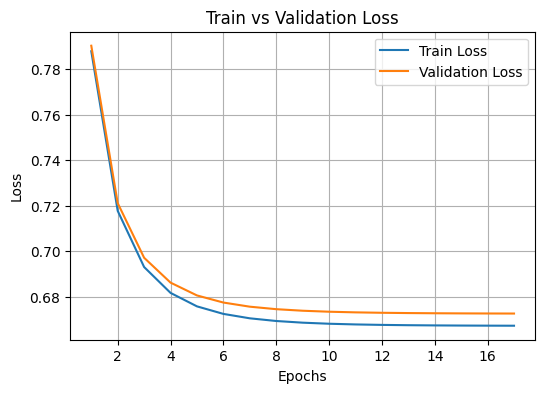

In [34]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

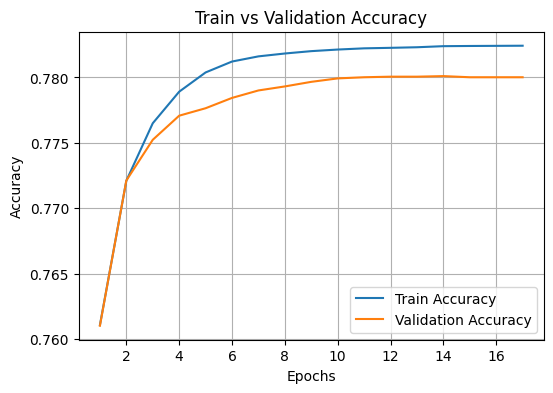

In [35]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

In [36]:
y_pred_lr = lr.predict(X_tfidf_test)
accuracy = accuracy_score(test_tfidf_label, y_pred_lr)
print(f"Acc: {accuracy:.4f}")

Acc: 0.7647


In [37]:
print(classification_report(test_tfidf_label, y_pred_lr))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      7026
           1       0.80      0.72      0.76      3905
           2       0.73      0.80      0.76      5952
           3       0.74      0.56      0.63      2713

    accuracy                           0.76     19596
   macro avg       0.76      0.73      0.74     19596
weighted avg       0.76      0.76      0.76     19596



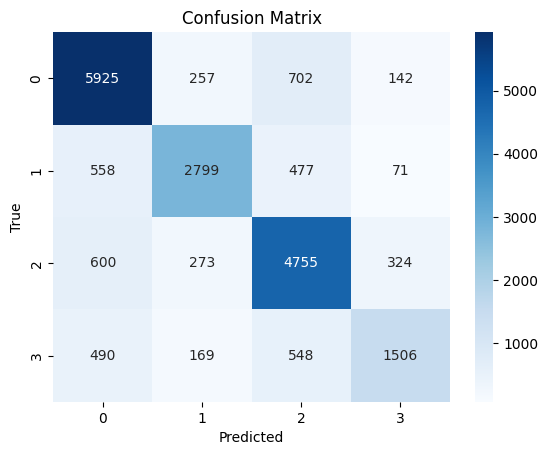

In [38]:
conf_matrix = confusion_matrix(test_tfidf_label, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [39]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_tfidf_train, train_tfidf_label)

RandomForestClassifier(random_state=42)

In [40]:
rfc_preds_test = rfc.predict(X_tfidf_test)

test_acc = np.mean(rfc_preds_test == test_tfidf_label)

print(f"RF - Acc: {test_acc:.4f}")

RF - Acc: 0.7745


In [41]:
print(classification_report(test_tfidf_label, rfc_preds_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7026
           1       0.76      0.77      0.76      3905
           2       0.75      0.80      0.77      5952
           3       0.74      0.61      0.67      2713

    accuracy                           0.77     19596
   macro avg       0.77      0.75      0.76     19596
weighted avg       0.77      0.77      0.77     19596



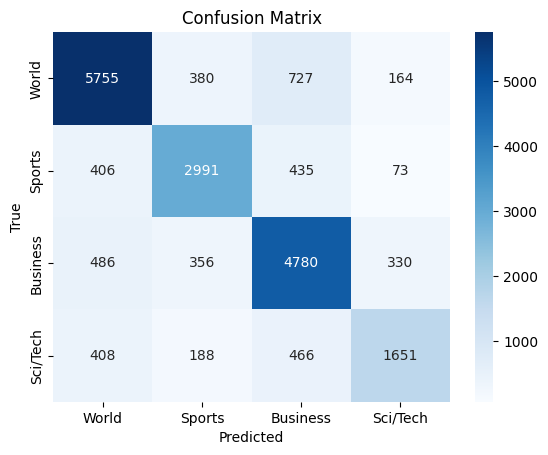

In [42]:
conf_matrix = confusion_matrix(test_tfidf_label, rfc_preds_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'], yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [43]:
xgb = XGBClassifier(n_estimator = 1000, max_depth = 6, learning_rate = 0.1, eval_metric='mlogloss', random_state=42)

In [44]:
eval_set = [(X_tfidf_train, train_tfidf_label), (X_tfidf_val, val_tfidf_label)]
xgb.fit(X_tfidf_train, train_tfidf_label, eval_set=eval_set, verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimator=1000,
              n_estimators=None, n_jobs=None, num_parallel_tree=None, ...)

In [45]:
results = xgb.evals_result()
train_loss = results['validation_0']['mlogloss']
val_loss = results['validation_1']['mlogloss']

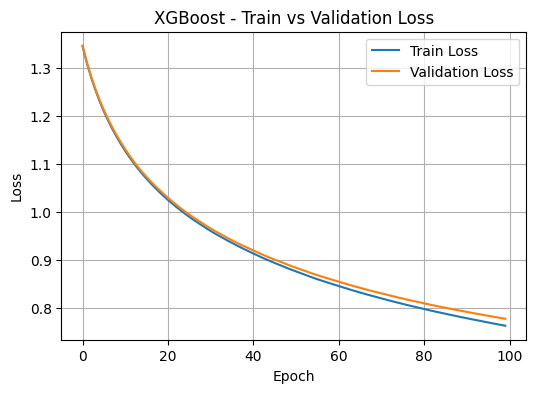

In [46]:
plt.figure(figsize=(6, 4))
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("XGBoost - Train vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [47]:
y_pred_xgb = xgb.predict(X_tfidf_test)
accuracy = accuracy_score(test_tfidf_label, y_pred_xgb)
print(f"Acc: {accuracy:.4f}")

Acc: 0.7230


In [48]:
print(classification_report(test_tfidf_label, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      7026
           1       0.82      0.60      0.69      3905
           2       0.62      0.83      0.71      5952
           3       0.75      0.52      0.62      2713

    accuracy                           0.72     19596
   macro avg       0.75      0.68      0.70     19596
weighted avg       0.74      0.72      0.72     19596



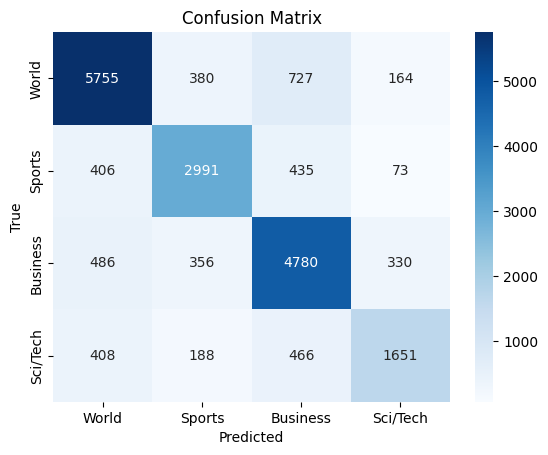

In [49]:
conf_matrix = confusion_matrix(test_tfidf_label, rfc_preds_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'], yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# DL models

**Preprocessing Data: Tokenize with pretrained tokenizer**

In [50]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [51]:
train_encode = [torch.tensor(tokenizer.encode(text, truncation=True, max_length=64)) for text in df_train_1['text']]
val_encode = [torch.tensor(tokenizer.encode(text, truncation=True, max_length=64)) for text in df_val_1['text']]
test_encode = [torch.tensor(tokenizer.encode(text, truncation=True, max_length=64)) for text in df_test_1['text']]

In [52]:
text_lengths = [len(tensor) for tensor in train_encode]

print("Max length:", max(text_lengths))
print("Min length:", min(text_lengths))
print("Average length:", sum(text_lengths) / len(text_lengths))

Max length: 64
Min length: 6
Average length: 45.74782858758274


In [53]:
x_train = pad_sequence(train_encode, batch_first=True, padding_value=tokenizer.pad_token_id)
x_val = pad_sequence(val_encode, batch_first=True, padding_value=tokenizer.pad_token_id)
x_test = pad_sequence(test_encode, batch_first=True, padding_value=tokenizer.pad_token_id)

In [54]:
train_label = df_train_1['label'].tolist()
val_label = df_val_1['label'].tolist()
test_label = df_test_1['label'].tolist()

In [55]:
y_train = torch.tensor(train_label, dtype=torch.long)
y_val = torch.tensor(val_label, dtype=torch.long)
y_test = torch.tensor(test_label, dtype=torch.long)

**Models**

LSTM

In [56]:
class TextDataset(Dataset):
    def __init__(self, inputs, labels):
        self.inputs = inputs
        self.labels = labels

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.labels[idx]

In [57]:
batch_size = 32

In [58]:
train_dataset = TextDataset(x_train, y_train)
val_dataset = TextDataset(x_val, y_val)
test_dataset = TextDataset(x_test, y_test)

In [59]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [60]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embd_dim, hidden_dim, output_dim, num_layers = 1):
        super(LSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embd_dim, padding_idx=tokenizer.pad_token_id)
        self.lstm = nn.LSTM(embd_dim, hidden_dim, num_layers, batch_first=True)
        self.dropout = nn.Dropout(0.25)
        self.dense = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        last_hidden = self.dropout(lstm_out[:, -1,  :])
        output = self.dense(last_hidden)
        return output

In [61]:
vocab_size = tokenizer.vocab_size
embd_dim = 64
hidden_dim = 256
output_dim = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [62]:
lstm = LSTM(vocab_size, embd_dim, hidden_dim, output_dim).to(device)

optimizer = torch.optim.Adam(lstm.parameters(), lr = 3e-5, weight_decay=1e-5)

criterion = torch.nn.CrossEntropyLoss().to(device)

In [63]:
def evaluate(model, data_loader, criterion, device):
    model.eval()
    predictions = []
    targets = []
    total_loss = 0
    with torch.no_grad():
        for batch in data_loader:
            texts, labels = batch
            texts, labels = texts.to(device), labels.to(device)

            outputs = model(texts)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            predictions.append(outputs.argmax(dim=1))
            targets.append(labels)

    predictions = torch.cat(predictions)
    targets = torch.cat(targets)
    accuracy = (predictions == targets).float().mean().item()
    avg_loss = total_loss / len(data_loader)

    return avg_loss, accuracy

In [64]:
num_epochs = 50
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

patience = 5
best_val_accuracy = 0
no_improvement_count = 0

for epoch in range(num_epochs):
    lstm.train()
    total_loss = 0
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = lstm(texts)
        loss = criterion(outputs, labels)
        loss.backward()
        # for name, param in lstm.named_parameters():
        #     if param.grad is not None:
        #         print(f"{name} gradient: {param.grad.norm().item()}")
        optimizer.step()

    train_loss, train_accuracy = evaluate(lstm, train_loader, criterion, device)
    val_loss, val_accuracy = evaluate(lstm, val_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f} | Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_count = 0
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}.")
            break


Epoch 1/50 - Train Loss: 1.0528, Train Acc: 0.5341 | Val Loss: 1.0614, Val Acc: 0.5320
Epoch 2/50 - Train Loss: 0.9494, Train Acc: 0.5891 | Val Loss: 0.9675, Val Acc: 0.5856
Epoch 3/50 - Train Loss: 0.8927, Train Acc: 0.6176 | Val Loss: 0.9109, Val Acc: 0.6096
Epoch 4/50 - Train Loss: 0.8426, Train Acc: 0.6383 | Val Loss: 0.8651, Val Acc: 0.6274
Epoch 5/50 - Train Loss: 0.7888, Train Acc: 0.6795 | Val Loss: 0.8199, Val Acc: 0.6668
Epoch 6/50 - Train Loss: 0.7157, Train Acc: 0.7242 | Val Loss: 0.7543, Val Acc: 0.7065
Epoch 7/50 - Train Loss: 0.6637, Train Acc: 0.7522 | Val Loss: 0.7079, Val Acc: 0.7336
Epoch 8/50 - Train Loss: 0.6076, Train Acc: 0.7795 | Val Loss: 0.6511, Val Acc: 0.7595
Epoch 9/50 - Train Loss: 0.5731, Train Acc: 0.7959 | Val Loss: 0.6216, Val Acc: 0.7767
Epoch 10/50 - Train Loss: 0.5510, Train Acc: 0.8040 | Val Loss: 0.6016, Val Acc: 0.7830
Epoch 11/50 - Train Loss: 0.5216, Train Acc: 0.8157 | Val Loss: 0.5810, Val Acc: 0.7940
Epoch 12/50 - Train Loss: 0.5012, Train A

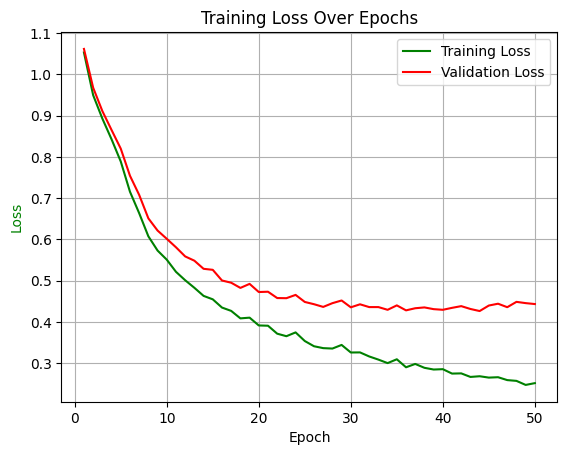

In [65]:
fig, ax1 = plt.subplots()
epochs_completed = len(train_losses)
ax1.plot(range(1, epochs_completed+1), train_losses, 'g-', label='Training Loss')
ax1.plot(range(1, epochs_completed+1), val_losses, 'r-', label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='g')
plt.title('Training Loss Over Epochs')
ax1.legend()
plt.grid()
plt.show()

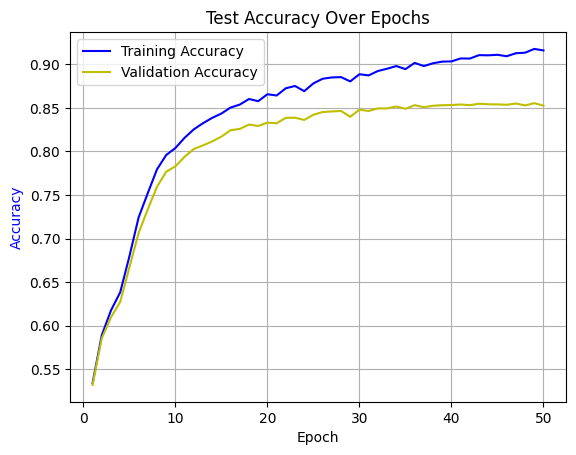

In [66]:
fig, ax1 = plt.subplots()
epochs_completed = len(train_losses)
ax1.plot(range(1, epochs_completed+1), train_accuracies, 'b-', label='Training Accuracy')
ax1.plot(range(1, epochs_completed+1), val_accuracies, 'y-', label='Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='b')
plt.title('Test Accuracy Over Epochs')
ax1.legend()
ax1.grid()
plt.show()

In [67]:
def evaluate_model(model, test_loader, device=device):
    model.eval()
    model.to(device)

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)

            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)

    return accuracy, all_labels, all_preds


In [68]:
def print_test_results(model, test_loader):

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    accuracy, y_true, y_pred = evaluate_model(model, test_loader, device)

    print(f"Accuracy: {accuracy:.4f}")

    print("\nClassification report:")
    print(classification_report(y_true, y_pred))

    print("\nConfusion matrix:")
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['World', 'Sports', 'Business', 'Sci/Tech'], yticklabels=['World', 'Sports', 'Business', 'Sci/Tech'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 0.8460

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7026
           1       0.84      0.88      0.86      3905
           2       0.86      0.85      0.85      5952
           3       0.73      0.77      0.75      2713

    accuracy                           0.85     19596
   macro avg       0.83      0.84      0.83     19596
weighted avg       0.85      0.85      0.85     19596


Confusion matrix:


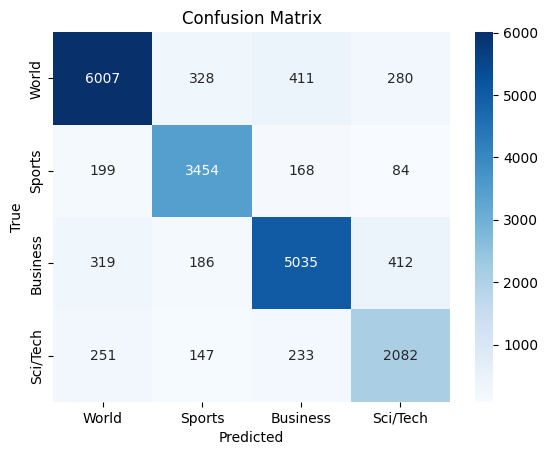

In [69]:
from sklearn.metrics import accuracy_score, classification_report
print_test_results(lstm, test_loader)

Bidirectional LSTM

In [70]:
import torch
import torch.nn as nn

class BiLSTM(nn.Module):
    def __init__(self, vocab_size, embd_dim, hidden_dim, output_dim, num_layers=1):
        super(BiLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embd_dim, padding_idx=tokenizer.pad_token_id)
        self.bilstm = nn.LSTM(embd_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.25)
        self.dense = nn.Linear(hidden_dim * 2, output_dim)  # *2 for bidirectional
        
    def forward(self, x):
        embedded = self.embedding(x)
        bilstm_out, _ = self.bilstm(embedded)
        last_hidden = self.dropout(bilstm_out[:, -1, :])  # Lấy output cuối
        output = self.dense(last_hidden)
        return output

In [71]:
bilstm = BiLSTM(vocab_size, embd_dim, hidden_dim, output_dim).to(device)

optimizer = torch.optim.Adam(bilstm.parameters(), lr = 3e-5, weight_decay=1e-4)

criterion = torch.nn.CrossEntropyLoss().to(device)

In [72]:
num_epochs = 70
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

patience = 5
best_val_accuracy = 0
no_improvement_count = 0

for epoch in range(num_epochs):
    bilstm.train()
    total_loss = 0
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = bilstm(texts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    train_loss, train_accuracy = evaluate(bilstm, train_loader, criterion, device)
    val_loss, val_accuracy = evaluate(bilstm, val_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f} | Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_count = 0
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}.")
            break


Epoch 1/70 - Train Loss: 1.0624, Train Acc: 0.5361 | Val Loss: 1.0685, Val Acc: 0.5316
Epoch 2/70 - Train Loss: 0.9650, Train Acc: 0.5899 | Val Loss: 0.9769, Val Acc: 0.5839
Epoch 3/70 - Train Loss: 0.9194, Train Acc: 0.6117 | Val Loss: 0.9346, Val Acc: 0.6050
Epoch 4/70 - Train Loss: 0.8829, Train Acc: 0.6256 | Val Loss: 0.9044, Val Acc: 0.6165
Epoch 5/70 - Train Loss: 0.8614, Train Acc: 0.6390 | Val Loss: 0.8877, Val Acc: 0.6284
Epoch 6/70 - Train Loss: 0.8229, Train Acc: 0.6548 | Val Loss: 0.8484, Val Acc: 0.6442
Epoch 7/70 - Train Loss: 0.7880, Train Acc: 0.6809 | Val Loss: 0.8130, Val Acc: 0.6692
Epoch 8/70 - Train Loss: 0.7093, Train Acc: 0.7249 | Val Loss: 0.7393, Val Acc: 0.7106
Epoch 9/70 - Train Loss: 0.6678, Train Acc: 0.7495 | Val Loss: 0.7033, Val Acc: 0.7351
Epoch 10/70 - Train Loss: 0.6283, Train Acc: 0.7697 | Val Loss: 0.6633, Val Acc: 0.7546
Epoch 11/70 - Train Loss: 0.6140, Train Acc: 0.7742 | Val Loss: 0.6489, Val Acc: 0.7575
Epoch 12/70 - Train Loss: 0.5282, Train A

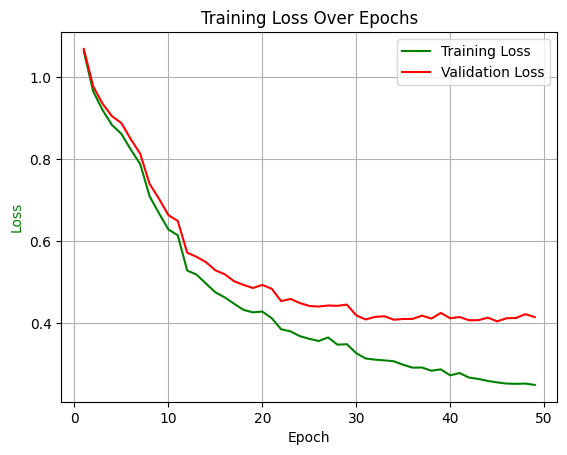

In [73]:
fig, ax1 = plt.subplots()
epochs_completed = len(train_losses)
ax1.plot(range(1, epochs_completed+1), train_losses, 'g-', label='Training Loss')
ax1.plot(range(1, epochs_completed+1), val_losses, 'r-', label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='g')
plt.title('Training Loss Over Epochs')
ax1.legend()
plt.grid()
plt.show()

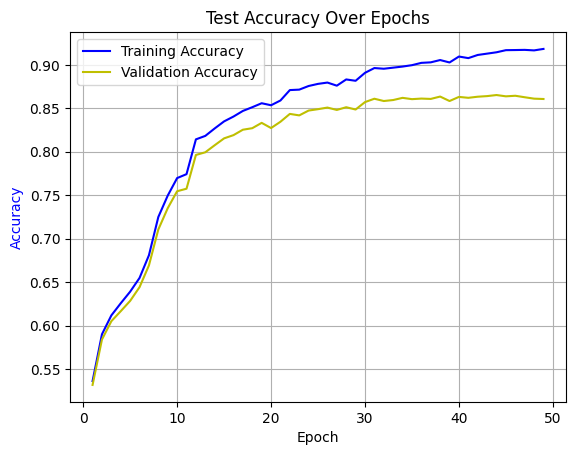

In [74]:
fig, ax1 = plt.subplots()
epochs_completed = len(train_losses)
ax1.plot(range(1, epochs_completed+1), train_accuracies, 'b-', label='Training Accuracy')
ax1.plot(range(1, epochs_completed+1), val_accuracies, 'y-', label='Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='b')
plt.title('Test Accuracy Over Epochs')
ax1.legend()
ax1.grid()
plt.show()

Accuracy: 0.8548

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7026
           1       0.87      0.87      0.87      3905
           2       0.87      0.85      0.86      5952
           3       0.74      0.79      0.76      2713

    accuracy                           0.85     19596
   macro avg       0.84      0.85      0.84     19596
weighted avg       0.86      0.85      0.86     19596


Confusion matrix:


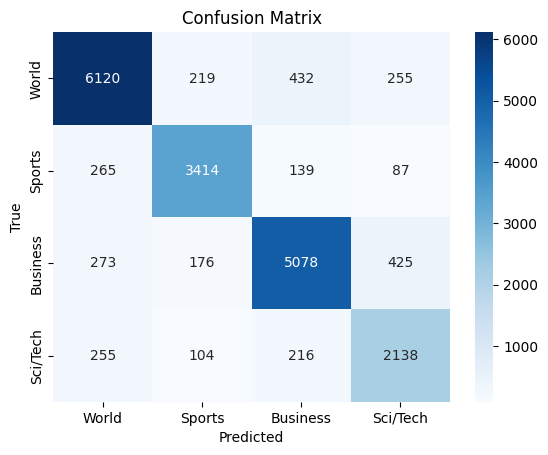

In [75]:
print_test_results(bilstm, test_loader)

GRU

In [76]:
class GRU(nn.Module):
    def __init__(self, vocab_size, embd_dim, hidden_dim, output_dim, num_layers=1):
        super(GRU, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embd_dim, padding_idx=tokenizer.pad_token_id)
        self.gru = nn.GRU(embd_dim, hidden_dim, num_layers, batch_first=True)
        self.dropout = nn.Dropout(0.25)
        self.dense = nn.Linear(hidden_dim, output_dim) 
        
    def forward(self, x):
        embedded = self.embedding(x)
        gru_out, _ = self.gru(embedded)
        last_hidden = self.dropout(gru_out[:, -1, :])  # Lấy output cuối
        output = self.dense(last_hidden)
        return output

In [77]:
gru = GRU(vocab_size, embd_dim, hidden_dim, output_dim).to(device)

optimizer = torch.optim.Adam(gru.parameters(), lr = 3e-5, weight_decay=1e-4)

criterion = torch.nn.CrossEntropyLoss().to(device)

In [78]:
num_epochs = 50
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

patience = 10
best_val_accuracy = 0
no_improvement_count = 0

for epoch in range(num_epochs):
    gru.train()
    total_loss = 0
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)  
        optimizer.zero_grad()
        outputs = gru(texts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    train_loss, train_accuracy = evaluate(gru, train_loader, criterion, device)
    val_loss, val_accuracy = evaluate(gru, val_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f} | Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_count = 0
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}.")
            break


Epoch 1/50 - Train Loss: 1.0730, Train Acc: 0.5188 | Val Loss: 1.0802, Val Acc: 0.5146
Epoch 2/50 - Train Loss: 0.9731, Train Acc: 0.5751 | Val Loss: 0.9838, Val Acc: 0.5699
Epoch 3/50 - Train Loss: 0.9206, Train Acc: 0.6108 | Val Loss: 0.9357, Val Acc: 0.6049
Epoch 4/50 - Train Loss: 0.7831, Train Acc: 0.6921 | Val Loss: 0.8055, Val Acc: 0.6833
Epoch 5/50 - Train Loss: 0.7059, Train Acc: 0.7313 | Val Loss: 0.7265, Val Acc: 0.7233
Epoch 6/50 - Train Loss: 0.6626, Train Acc: 0.7550 | Val Loss: 0.6851, Val Acc: 0.7465
Epoch 7/50 - Train Loss: 0.6064, Train Acc: 0.7800 | Val Loss: 0.6332, Val Acc: 0.7695
Epoch 8/50 - Train Loss: 0.5799, Train Acc: 0.7915 | Val Loss: 0.6129, Val Acc: 0.7799
Epoch 9/50 - Train Loss: 0.5691, Train Acc: 0.7946 | Val Loss: 0.6010, Val Acc: 0.7827
Epoch 10/50 - Train Loss: 0.5398, Train Acc: 0.8074 | Val Loss: 0.5780, Val Acc: 0.7948
Epoch 11/50 - Train Loss: 0.5245, Train Acc: 0.8129 | Val Loss: 0.5656, Val Acc: 0.7965
Epoch 12/50 - Train Loss: 0.5064, Train A

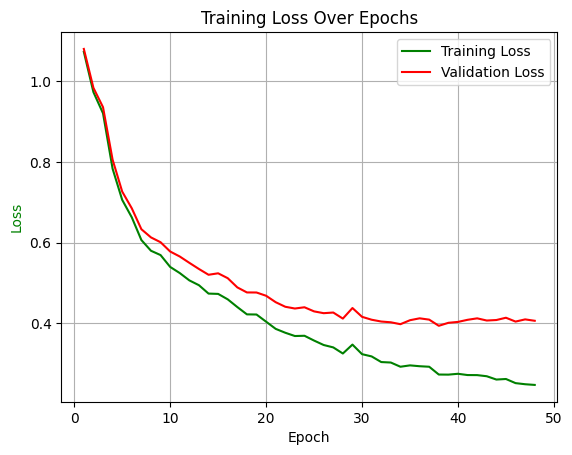

In [79]:
fig, ax1 = plt.subplots()
epochs_completed = len(train_losses)
ax1.plot(range(1, epochs_completed+1), train_losses, 'g-', label='Training Loss')
ax1.plot(range(1, epochs_completed+1), val_losses, 'r-', label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='g')
plt.title('Training Loss Over Epochs')
ax1.legend()
plt.grid()
plt.show()

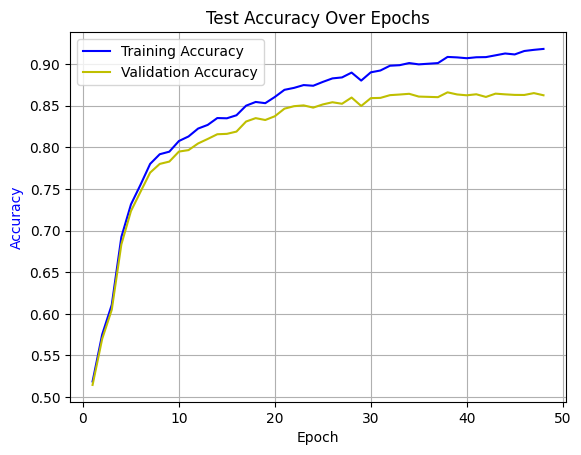

In [80]:
fig, ax1 = plt.subplots()
epochs_completed = len(train_losses)
ax1.plot(range(1, epochs_completed+1), train_accuracies, 'b-', label='Training Accuracy')
ax1.plot(range(1, epochs_completed+1), val_accuracies, 'y-', label='Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='b')
plt.title('Test Accuracy Over Epochs')
ax1.legend()
ax1.grid()
plt.show()

Accuracy: 0.8568

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7026
           1       0.85      0.90      0.87      3905
           2       0.85      0.88      0.87      5952
           3       0.78      0.76      0.77      2713

    accuracy                           0.86     19596
   macro avg       0.84      0.85      0.84     19596
weighted avg       0.86      0.86      0.86     19596


Confusion matrix:


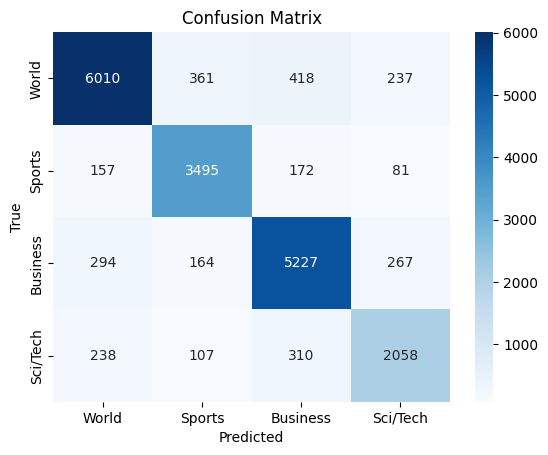

In [81]:
print_test_results(gru, test_loader)

Transformer

In [82]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # Shape: (1, max_len, d_model)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x: (batch_size, seq_len, d_model)
        pe = self.pe[:, :x.size(1), :].to(device=x.device).detach()
        x = x + pe
        return x

In [83]:
class TransformerClassification(nn.Module):
    def __init__(self, vocab_size, embd_dim, nhead, num_encoder_layers, num_classes, max_len = 64, dropout = 0.25):
        super(TransformerClassification, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embd_dim, padding_idx=tokenizer.pad_token_id)
        self.pos_encoder = PositionalEncoding(embd_dim, max_len)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model = embd_dim,
            nhead = nhead,
            dim_feedforward = embd_dim * 4,
            dropout = dropout,
            batch_first = True,
        )

        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers = num_encoder_layers)
        self.dropout = nn.Dropout(dropout)
        self.dense = nn.Linear(embd_dim, num_classes)
        self.d_model = embd_dim

        self._init_weights()

    def _init_weights(self):
        nn.init.xavier_uniform_(self.embedding.weight)
        nn.init.xavier_uniform_(self.dense.weight)
        nn.init.zeros_(self.dense.bias)

    def forward(self, x):
        x = self.embedding(x) * math.sqrt(self.d_model)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        x = self.dropout(x)
        x = self.dense(x)
        return x

In [84]:
def create_model(vocab_size, embd_dim = 64, nhead = 4, num_encoder_layers = 2, num_classes = 4, max_len = 64, dropout = 0.25):
    model = TransformerClassification(vocab_size, embd_dim, nhead, num_encoder_layers, num_classes, max_len, dropout)
    return model

In [85]:
transformer = create_model(vocab_size, embd_dim, nhead = 4, num_encoder_layers = 2, num_classes = 4, max_len = 64, dropout = 0.25).to(device)
optimizer = torch.optim.AdamW(transformer.parameters(), lr = 3e-5, weight_decay=1e-4)
criterion = torch.nn.CrossEntropyLoss().to(device)

In [86]:
num_epochs = 50
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

patience = 10
best_val_accuracy = 0
no_improvement_count = 0

for epoch in range(num_epochs):
    transformer.train()
    total_loss = 0
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = transformer(texts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    train_loss, train_accuracy = evaluate(transformer, train_loader, criterion, device)
    val_loss, val_accuracy = evaluate(transformer, val_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f} | Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_count = 0
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}.")
            break

Epoch 1/50 - Train Loss: 0.3739, Train Acc: 0.8717 | Val Loss: 0.4270, Val Acc: 0.8525
Epoch 2/50 - Train Loss: 0.3098, Train Acc: 0.8949 | Val Loss: 0.3967, Val Acc: 0.8670
Epoch 3/50 - Train Loss: 0.2806, Train Acc: 0.9030 | Val Loss: 0.4023, Val Acc: 0.8658
Epoch 4/50 - Train Loss: 0.2453, Train Acc: 0.9167 | Val Loss: 0.3975, Val Acc: 0.8705
Epoch 5/50 - Train Loss: 0.2232, Train Acc: 0.9252 | Val Loss: 0.4106, Val Acc: 0.8675
Epoch 6/50 - Train Loss: 0.2131, Train Acc: 0.9286 | Val Loss: 0.4356, Val Acc: 0.8620
Epoch 7/50 - Train Loss: 0.1981, Train Acc: 0.9333 | Val Loss: 0.4581, Val Acc: 0.8570
Epoch 8/50 - Train Loss: 0.1738, Train Acc: 0.9431 | Val Loss: 0.4786, Val Acc: 0.8587
Epoch 9/50 - Train Loss: 0.1497, Train Acc: 0.9519 | Val Loss: 0.5021, Val Acc: 0.8590
Epoch 10/50 - Train Loss: 0.1410, Train Acc: 0.9543 | Val Loss: 0.5367, Val Acc: 0.8534
Epoch 11/50 - Train Loss: 0.1229, Train Acc: 0.9617 | Val Loss: 0.5688, Val Acc: 0.8505
Epoch 12/50 - Train Loss: 0.1068, Train A

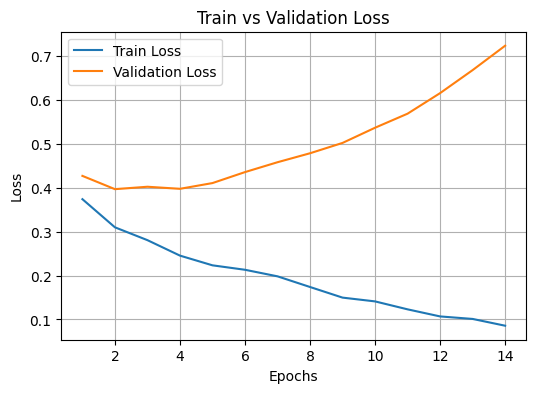

In [87]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

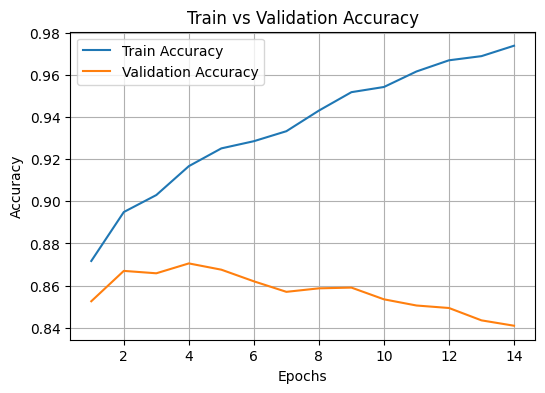

In [88]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

Accuracy: 0.8299

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7026
           1       0.82      0.88      0.85      3905
           2       0.83      0.85      0.84      5952
           3       0.73      0.73      0.73      2713

    accuracy                           0.83     19596
   macro avg       0.81      0.82      0.82     19596
weighted avg       0.83      0.83      0.83     19596


Confusion matrix:


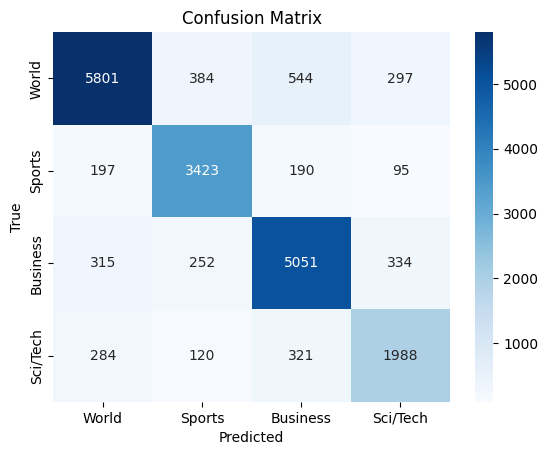

In [89]:
print_test_results(transformer, test_loader)